In [47]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [48]:
image_size=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test'
valid_path='/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Train'

In [49]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
resnet=ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [50]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [51]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Train/*')

In [52]:
x = Flatten()(resnet.output)


In [53]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [54]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [55]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [56]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [57]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [58]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [59]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=55,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-59-078857f76a13>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/55
2/2 [==============================] - 7s 2s/step - loss: 5.3616 - accuracy: 0.3281 - val_loss: 6.5696 - val_accuracy: 0.5172
Epoch 2/55
2/2 [==============================] - 1s 824ms/step - loss: 8.1597 - accuracy: 0.4531 - val_loss: 4.7614 - val_accuracy: 0.3276
Epoch 3/55
2/2 [==============================] - 1s 852ms/step - loss: 3.0033 - accuracy: 0.5312 - val_loss: 7.2496 - val_accuracy: 0.1552
Epoch 4/55
2/2 [==============================] - 1s 841ms/step - loss: 5.5537 - accuracy: 0.3281 - val_loss: 3.5188 - val_accuracy: 0.5345
Epoch 5/55
2/2 [==============================] - 1s 812ms/step - loss: 3.1964 - accuracy: 0.3750 - val_loss: 1.1124 - val_accuracy: 0.5690
Epoch 6/55
2/2 [==============================] - 1s 838ms/step - loss: 2.3746 - accuracy: 0.3750 - val_loss: 4.7065 - val_accuracy: 0.3276
Epoch 7/55
2/2 [==============================] - 2s 1s/step - loss: 2.6460 - accuracy: 0.5312 - val_loss: 4.5009 - val_accuracy: 0.1552
Epoch 8/55
2/2 [==========

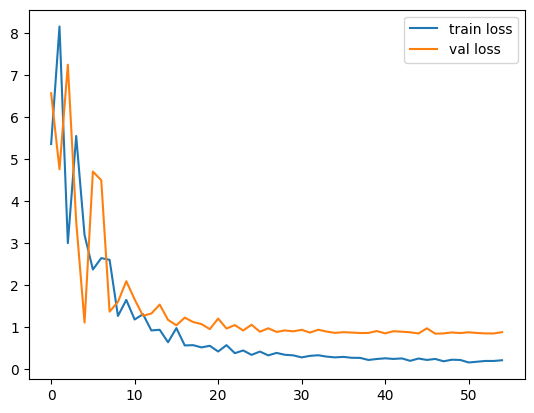

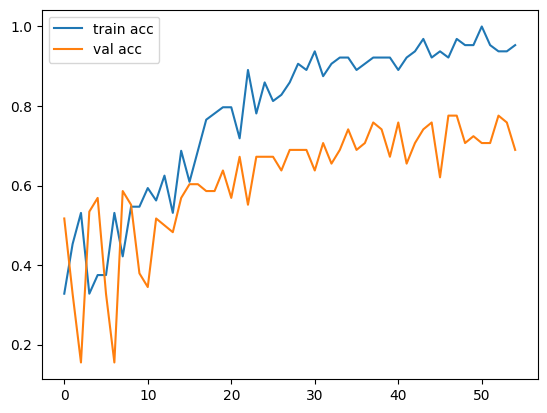

In [60]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [61]:
# from tensorflow.keras.models import load_model

# model.save('Model_resnet50_E42.h5')

In [62]:
from tensorflow.keras.preprocessing import image
from PIL import Image

def model_predict(img_path, model):
    img = Image.open(img_path)
    img = img.resize((224, 224), resample=Image.BILINEAR)


    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x = x / 255
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    print(preds)
    preds = np.argmax(preds, axis=1)
    if preds == 0:
        preds = "The Car IS Audi"
    elif preds == 1:
        preds = "The Car is Lamborghini"
    else:
        preds = "The Car Is Mercedes"

    return preds


In [63]:
print(model_predict('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test/lamborghini/13.jpg',model))

1/1 [==============================] - 1s 855ms/step
[[0.00190843 0.98788005 0.01021154]]
The Car is Lamborghini


In [64]:
print(model_predict('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test/lamborghini/10.jpg',model))

1/1 [==============================] - 0s 21ms/step
[[0.01245347 0.98381746 0.00372904]]
The Car is Lamborghini


In [65]:
print(model_predict('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test/audi/29.jpg',model))

1/1 [==============================] - 0s 21ms/step
[[0.80318683 0.15753233 0.03928078]]
The Car IS Audi


In [66]:
print(model_predict('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test/lamborghini/19.jpg',model))

1/1 [==============================] - 0s 21ms/step
[[0.01123936 0.87697613 0.11178449]]
The Car is Lamborghini


In [67]:
print(model_predict('/content/drive/MyDrive/Colab Notebooks/Car_Brand_Class_classifier/Test/mercedes/29.jpg',model))

1/1 [==============================] - 0s 24ms/step
[[0.06699257 0.03827558 0.8947319 ]]
The Car Is Mercedes
